<h1>Should Czech people be concerned about the Syrian Refugee quota suggested by the EU?</h1><br>

<h3>By Barbora Doslikova</h3><br>

<h4>Czech people are worried that Syrian refugees will flood their country, use social benefits to exploit the Czech social system and use religion to influence Czech culture beyond recognition (https://www.facebook.com/ivcrn).</h4><br>

<h4>The Czech Republic EU refugee quota is 1863 people (http://zpravy.aktualne.cz/zahranici/nova-zed-v-evrope-brusel-zverejnil-plan-kvot-na-uprchliky/r~204b65b4f94f11e490ae0025900fea04/).</h4>

<h4>Do concerns of the Czechs have merit?</h4>

Data source: https://vdb2.czso.cz/vdbvo2/faces/index.jsf?page=vystup-objekt&evo=&str=&zo=N&pvo=CIZ08&vyhltext=&verze=-1&nahled=N&sp=N&nuid=&zs=&skupId=&katalog=31032&filtr=G~F_M~F_Z~F_R~F_P~_S~_null_null_&pvokc=&udIdent=&pvoch=&z=T#w= 

Source: The Czech Statistical Office.<br>
Data were generated & downloaded on: 25.10.2015 00:31:37<br>
Unit: Number.<br>
Reference time: 2004 - 2014.<br>
Nationalities; Years.<br>

<h3><strong>Read And Prepare The Data</strong></h3>

In [10]:
import pandas as pd

def read_file(name='foreignersCZv2.xls'):
    # open data direcly as pandas.core.frame.DataFrame
    df = pd.read_excel(name)
    return df

data = read_file()

print(data.head())

# number of rows (11) by columns (5)
print(data.shape)

   Year   Total      EU  Non-EU  Syria
0  2004  255917   80246  175671    354
1  2005  280111   87144  192967    378
2  2006  323343  102886  220457    408
3  2007  394345  131052  263293    436
4  2008  439498  145974  293524    468
(11, 5)


In [11]:
# calculates the 5th column
data['Non-EU - Syria'] = data['Non-EU'] - data['Syria']

print(data.head())
print(data.shape)

   Year   Total      EU  Non-EU  Syria  Non-EU - Syria
0  2004  255917   80246  175671    354          175317
1  2005  280111   87144  192967    378          192589
2  2006  323343  102886  220457    408          220049
3  2007  394345  131052  263293    436          262857
4  2008  439498  145974  293524    468          293056
(11, 6)


In [12]:
# drops the now useless 'Non-EU' column
data.drop('Non-EU',axis=1, inplace=True)
print(data.tail())
print(data.shape)

    Year   Total      EU  Syria  Non-EU - Syria
6   2010  426423  135554    565          290304
7   2011  436319  151425    586          284308
8   2012  438076  160792    638          276646
9   2013  441536  173593    825          267118
10  2014  451923  184511    889          266523
(11, 5)


<h3><strong>Visualise The Number of Foreigners Living In The Czech Republic In The Last 10 Years</strong></h3>

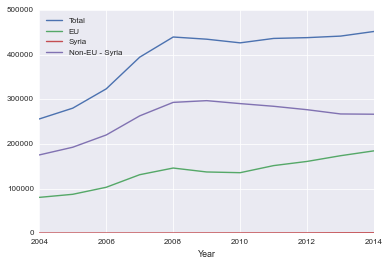

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline  
data.plot(x='Year')

<strong>The total number of foreigners</strong> living in the Czech Republic <strong>(blue)</strong> has increased over the last 10 years but remained constant over the last 7 years i.e. since 2008.

The number of foreigners living in the Czech Republic originally <strong>from the EU (green)</strong> has increased over the last 10 years.

The number of foreigners living in the Czech Republic originally <strong>from the non-EU states except for Syria (purple)</strong> has increased between 2004 and 2008 but has gone down since 2008.

The number of foreigners living in the Czech Republic originally <strong>from Syria (red)</strong> cannot be easily observed at this scale.

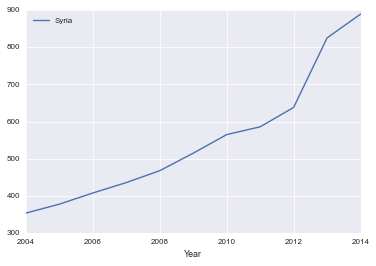

In [14]:
data.plot(x='Year', y='Syria')

The number of foreigners living in the Czech Republic originally <strong>from Syria</strong> has increased over the last 10 years, particularly since 2012.

<h4><strong>A. Are the data parametric?</strong></h4>

Syria skewtest: teststat =  1.448; pvalue = 0.1477
Syria kurtosis: teststat =  0.222; pvalue = 0.8240
Syria normaltest: teststat =  2.145; pvalue = 0.3421


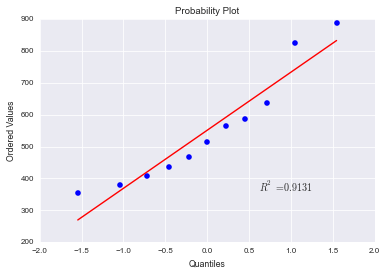

In [15]:
import scipy as sc
import scipy.stats as stats
import pylab
print('Syria skewtest: teststat = %6.3f; pvalue = %6.4f' % sc.stats.skewtest(data['Syria']))
# => +1.4 = highly skewed to the left (+-0.5 = normal)
print('Syria kurtosis: teststat = %6.3f; pvalue = %6.4f' % sc.stats.kurtosistest(data['Syria']))
# => 0.2 = almost normal (0 = normal)(-3 = completely flat)
print('Syria normaltest: teststat = %6.3f; pvalue = %6.4f' % sc.stats.normaltest(data['Syria']))
# => skew & kurtosis tests combined, not normal if p is significant

stats.probplot(data['Syria'], dist="norm", plot=pylab)
pylab.show()

Numbers of foreigners with Syrian origin are parametric.

<h4><strong>B. Are the changes over time (statistically significantly) correlated?</strong></h4><br>
<em>Use parametric Pearson's correlation test, not non-parametric Spearmen's correlation test.</em>

In [16]:
cor1 = stats.pearsonr(data['Syria'], data['Year'])
print('Syria vs. Year: {0}'.format(cor1))

Syria vs. Year: (0.95210057966581441, 6.2928250162592372e-06)


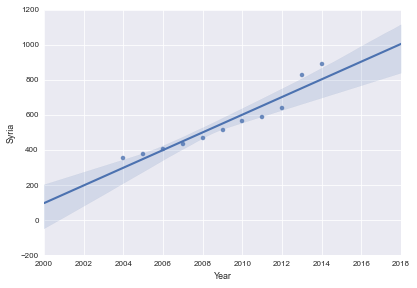

In [17]:
import seaborn as sns
sns.set()
sns.set_context("paper") # not talk, poster, notebook
sns.regplot(data['Year'], data['Syria'])

The variables are significantly correlated. The relationship is positive.<br>
The number of Syrian foreigners in the Czech Republic has significantly increased over time.

<h3>Findings And Conclusions:</h3><br>
<strong>Should Czech sbe worried about the EU refugee quotas?</strong><br>

<strong>Foreigners of Syrian origin</strong> currently living in the Czech Republic (in 2014) represent <strong>only 0.2% of all foreigners</strong> in the country. Adding people as required by the quota would increase the percentage to <strong>0.6%</strong>.<br>

Se my infographic at
https://magic.piktochart.com/output/8778065-cz-quotas.<br>

Given these numbers, <strong>NO</strong>, it is unlikely that the extra people from Syria would flood the country and exploit and influence it as the Czech people worry.<br>
